In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ipywidgets as widgets
import pandas as pd
import sympy

In [2]:
isnumeric = lambda x: isinstance(x, (int, float, complex)) and not isinstance(x, bool)

# Intro to Integrals

In learning about the Normal Distribution, we used this chart to bound the probability that the population expected value is within certain bounds (i.e., a number of standard errors $\sigma$) around the expected value of sample expected values based on the number of standard errors.

<img src="Standard_deviation_diagram.svg.png" width="40%"/>

But how do we know these percentages? And what if we choose bounds that are not integer multiples of $\sigma$?

In the Derivatives module, I mentioned that the answer is ***integrals***!

Previously, I used an example of a car's distance travelled over time to explore the relationship between the car's speed (i.e., rate of change) and the ***integral*** of the speed function.

If we track a car's speed over time (i.e., a rate of change), then we can calculate how far the car has traveled (i.e., accumulated distance).

- the car traveled 5 miles per hour (mph) for 2 hours,
- then traveled 10 mph for 1 hour,
- and then traveleld 15 mph for 3 hours.

This means the car traveled 

$
\begin{align}
\left(2\text{ hour}\right)\left(5\frac{\text{miles}}{\text{hour}}\right) &+ \left(1\text{ hour}\right)\left(10\frac{\text{miles}}{\text{hour}}\right) + \left(3\text{ hour}\right)\left(15\frac{\text{miles}}{\text{hour}}\right) \\
&= 2\cdot5\text{ miles} + 1\cdot10\text{ miles} + 3\cdot15\text{ miles} \\
&= 65\text{ miles}
\end{align}
$

This calculation is taking an <font color="blue">integral</font> using rates of change to find the accumulated distance traveled.

In [3]:
#hide
def exploreCarDerivative(time):
    xx = time
    x = np.arange(7)
    y = np.array([5,5,5,10,15,15,15])
    cy = np.cumsum(y)
#     plt.figure(figsize=(8,6))
    plt.plot(x,cy,'k-',linewidth=3)
    yy = plt.ylim()
#     plt.plot([2,2],yy,'b--')
#     plt.plot([3,3],yy,'b--')
    plt.ylim(yy)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Hours",fontsize=15)
    plt.ylabel("Distance Travelled (miles)",fontsize=15);
    for i in range(len(x)-1):
        if xx >= x[i] and xx < x[i+1]:
            f = (xx-x[i])/(x[i+1]-x[i])
            yy = cy[i]+(cy[i+1]-cy[i])*f
            s = y[i+1]
            break
    plt.plot(xx,yy,'ro',markersize=15)
    plt.text(xx,yy,"%d mph" % s,va="bottom",ha="right",fontsize=15)
    plt.title("Rate of change from distance travelled",fontsize=15);
    plt.tight_layout()
    
def exploreCarIntegral(time,):
    x = [0,2,2,3,3,6]
    y = [5,5,10,10,15,15]
    x = np.array(x)
    y = np.array(y)
    A = 0.0
    for i in range(len(x)-1):
        if time >= x[i] and time < x[i+1]:
            f = (x[i+1]-time)/(x[i+1]-x[i])
            s = y[i]
            I = i
            A += (time-x[i])*y[i]
            break
        else:
            A += (x[i+1]-x[i])*y[i]
#     plt.figure(figsize=(8,6))
    plt.plot(x,y,'k-',linewidth=3)
    plt.fill_between(x[:I],y[:I],color='blue',alpha=.5,linewidth=0)
    plt.fill_between([x[I],time],[s,s],color='blue',alpha=.5,linewidth=0)
    plt.plot(time,s,'ro',markersize=15)
    plt.text(time,s,"%d mph" % s,va="bottom",ha="right",fontsize=15)
    plt.ylim((0,16))
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Hours",fontsize=15)
    plt.ylabel("Speed (mph)",fontsize=15)
    plt.title("Distance travelled from rate of change: %0.2f miles" % A,fontsize=15);
    plt.tight_layout()
    
    
def plotCarDerivInt(time):
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    exploreCarDerivative(time)
    plt.subplot(1,2,2)
    exploreCarIntegral(time)

widgets.interact(plotCarDerivInt,time=(0,5.9,.1));

interactive(children=(FloatSlider(value=2.9000000000000004, description='time', max=5.9), Output()), _dom_clas…

The car's (unrealistic) instantaneous change in speed makes it easy to calculate the integral because the area under the curve of the speed-over-time function can easily be broken up into rectangles.

But what about more complicated speed-over-time functions?

In [4]:
#hide 
def trapSpeed(time):
    if isnumeric(time):
        if time < 3:
            return 5
        else:
            return 5+(time-3)*2
    else:
        speeds = 5*np.ones(len(time))
        I = time >= 3
        speeds[I] += 2*(time[I]-3)
        return speeds

def plotSpeed(F,time):
    times = np.linspace(0,6)
    speed = F(times)
    plt.figure(figsize=(8,6))
    plt.plot(times,speed,'k-',linewidth=3)
    times2 = np.linspace(0,time,)
    plt.fill_between(times2,0,F(times2),color='b',alpha=.4)
    plt.plot(time,F(time),'ro',markersize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Time (hours)",fontsize=15)
    plt.ylabel("Speed (mph)",fontsize=15)
    plt.ylim((0,plt.ylim()[1]))
    plt.tight_layout()
    
    
def trapDemo(time,showTriangle=False):
    plotSpeed(trapSpeed,time)
    if showTriangle:
        plt.plot([3,3],[0,5],'k--',linewidth=3)
        plt.plot([3,6],[5,5],'k--',linewidth=3)
        plt.plot([6,6],[0,trapSpeed(6)],'k--',linewidth=3)

# widgets.interact(plotSpeed,time=(0,6,.1),showTriangle=False);
timeSlider = widgets.FloatSlider(min=0, max=6, step=0.1, value=0, description="Time:")
showTriangleCheckBox = widgets.Checkbox(value=False,description="Show Geometry")
widgets.HBox(
    [
        widgets.VBox([timeSlider,showTriangleCheckBox]),
            widgets.interactive_output(
                trapDemo,
                {
                    'time': timeSlider,
                    'showTriangle':showTriangleCheckBox,
                })
    ]
)

Here, we can again find the area under the curve geometrically by adding areas of rectangles to areas of triangles.

However, functions are not always so simple!

How do we find the area under this curvy function?

In [5]:
# hide
def curvySpeed(time):
    return (time-0)*(time-3)*(time-5)+5
def curvyDemo(time):
    plotSpeed(curvySpeed,time)
    
timeSlider = widgets.FloatSlider(min=0, max=6, step=0.1, value=0, description="Time:")
# showTriangleCheckBox = widgets.Checkbox(value=False,description="Show Geometry")
widgets.HBox(
    [
        widgets.VBox([timeSlider,]),
            widgets.interactive_output(
                curvyDemo,
                {
                    'time': timeSlider,
#                     'showTriangle':showTriangleCheckBox,
                })
    ]
)

In this module, we will explore how to find integrals and areas under a function no matter how curvy. 

# Approximating the Area Under the Curve

In general, how do we calculate the area under a function $f(x)$?

We looked an example where we could quickly divide the space into rectangles and sum the areas of those rectangles.

In [6]:
#hide
widgets.interact(plotCarDerivInt,time=(0,5.9,.1));

interactive(children=(FloatSlider(value=2.9000000000000004, description='time', max=5.9), Output()), _dom_clas…

It may not be possible to divide the area under $f(x)$ into rectangles so obviously.

But the actual solution is not too different!

We will ***partition*** the domain of $f(x)$ into equally spaced bins (i.e., all bins have the same width).

A partition $P$ breaks up the domain (i.e., possible inputs to $f(x)$) into smaller ***sub-intervals*** that cover the complete domain without overlapping.

For example, let's say we are interested in the area under $f(x)$ on the domain $x\in(0,10)$.

Here are some ways to partition $(0,10)$ into equal-width sub-intervals.

In [7]:
#hide
def plot_number_line(n_bins):
    """
    Plots the real number line from 0 to 10 and partitions it into n_bins equal width bins.

    Args:
    n_bins: int - Number of equal width bins to partition the number line.
    """
    # Generate the bin edges
    bin_edges = np.linspace(0, 10, n_bins + 1)
    
    # Create the plot
    plt.figure(figsize=(10,1))
    plt.plot([0, 10], [0, 0], 'k-', lw=2)  # Draw the number line
    
    # Draw the bins
    for edge in bin_edges:
        plt.plot([edge, edge], [-0.1, 0.1], 'r-', lw=2)  # Draw bin edges

    plt.xlim((-1, 11))
    plt.ylim((-.2, .2))
    plt.yticks([])
    plt.xticks(fontsize=15)
    plt.xlabel("x",fontsize=15)
#     ax.axis('off')  # Turn off the axis
#     plt.show()

widgets.interactive(plot_number_line, n_bins=widgets.IntSlider(min=1, max=50, step=1, value=1))

interactive(children=(IntSlider(value=1, description='n_bins', max=50, min=1), Output()), _dom_classes=('widge…

Recall that we specified that each sub-interval in $P$ has the same width. 

Therefore, if sub-intervals $(a,b),\,(c,d)\in P$, then $\hspace{.5cm}b-a = d-c$.

So let's just represent the widths with a constant representing a <font color="red">"change in $x$"</font>: $\hspace{.5cm}b-a=d-c=\,\color{red}{dx}$

Uncoincidentally, $\color{red}{dx}$ here represents the same thing as in the derivative notation: 
$
\hspace{.5cm}
\displaystyle
\frac{d\,f(x)}{\color{red}{dx}}
$

## Riemann Summations
Using partition $P$ of some domain of $f(x)$, we break up the area under $f(x)$ into little rectangles by evaluating $f$ at either the left or right endpoints of each sub-interval within $P$.

If $(a,b)$ is a sub-interval in $P$, then we calculate $\hspace{.5cm}f(a)\cdot (b-a)\hspace{.5cm}$ or $\hspace{.5cm}f(b)\cdot(b-a)\hspace{.5cm}$

If evaluating from the left:
$
\hspace{.5cm}
\displaystyle
\begin{align}
&\\
\sum_{(a,b)\in P}f(a)\cdot (b-a)  &= \sum_{(a,b)\in P}f(a)\,dx
\\\\
\end{align}
$
<br/>

or, if evaluating from the right:
$
\hspace{.5cm}
\displaystyle
\begin{align}
\sum_{(a,b)\in P}f(b)\cdot (b-a)  = \sum_{(a,b)\in P}f(b)\,dx
\end{align}
$

Note that $f(a)<0$ implies that a negative area is added to the sum.

In [8]:
from ipywidgets import interact, FloatSlider,Checkbox

def getRiemann(f, width,domain,left=True):
    x = np.arange(np.min(domain), np.max(domain), width)
    if left:
        y = f(x)
    else:
        y = f(x+width)
    S = width*np.sum(y)
    return x,y,S

def plotRiemann(f,width,domain,left=True):
    x,y,S = getRiemann(f,width,domain,left)
    plt.bar(x, y, width=width, edgecolor='black', alpha=0.5, label='Riemann Rectangles',align="edge")
    return x,y,S
    
    
def plotRiemannExample(f,width,domain,left=True,ylim=None,highlightSubInterval=False,subIntervalId=1,):
    y = f(domain)
    plt.plot(domain, y, 'k', label='f(x)')
    
    P,Py,S = plotRiemann(f,width,domain,left)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('f(x)',fontsize=15)
    plt.title('Riemann Sum Approximation: %0.2f' % S, fontsize=15)
    plt.legend(fontsize=15,frameon=False)
    
    if highlightSubInterval and subIntervalId < len(P):
        p = P[subIntervalId]
        py = Py[subIntervalId]
        lw = 3
        plt.plot([p,p+width],[0,0],'r-',linewidth=lw)
        plt.plot([p,p],[0,py],'r-',linewidth=lw)
        plt.plot([p+width,p+width],[0,py],'r-',linewidth=lw)
        plt.plot([p,p+width],[py,py],'r-',linewidth=lw)
        X = .01*(domain[-1]-domain[0])
        Y = .05*(np.max(y)-np.min(y))
        plt.text(p+width/2,
                 -Y if py > 0 else Y,
                 "(a,b)",
                 ha="center",
                 va="top" if py > 0 else "bottom",
                 fontsize=20,color='r',
                )
        plt.text(
            p-X if left else p+width+X,
            py/2,
            "f(a)" if left else "f(b)",
            ha="right" if left else "left",
            va="center",
            fontsize=20,color='r',
        )
    
    if ylim is None:
        plt.ylim((0,np.max(y)))
    else:
        plt.ylim(ylim)
    return P,Py,S
    
    
def sineRiemann(width,domain,left=True,highlightSubInterval=False,subIntervalId=1,):
    plt.figure(figsize=(10,5))
    P,Py,S = plotRiemannExample(np.sin,width,domain,left,
                                ylim=(-1.05,1.05),
                                highlightSubInterval=highlightSubInterval,
                                subIntervalId=subIntervalId,
                               )
    plt.xlim((domain[0],domain[-1]))

For example, consider the Riemann sum of $\hspace{.5cm}f(x)=\sin(x)$ 

In [9]:
#hide 
sineWidthSlider = FloatSlider(min=0.05, max=2.0, step=0.05, value=2,description="width:")
sineLR = Checkbox(value=True,description="Evaluate Left?")
sineSubIntervalCheckBox = Checkbox(value=False,description="Show Sub-Interval:")
sineSubIntervalSlider = widgets.IntSlider(min=0,max=100,step=1,value=1,description="Select Sub-Interval:")
widgets.HBox(
    [
        widgets.VBox([sineWidthSlider,sineLR,sineSubIntervalCheckBox,sineSubIntervalSlider,]),
            widgets.interactive_output(
                sineRiemann,
                {
                    'width': sineWidthSlider,
                    'domain':widgets.fixed(np.linspace(0,10,100)),
                    'left':sineLR,
                    'highlightSubInterval':sineSubIntervalCheckBox,
                    'subIntervalId':sineSubIntervalSlider,
                })
    ]
)

Let's return to our curvy polynomial.

In [10]:
timeSlider = widgets.FloatSlider(min=0, max=6, step=0.1, value=0, description="Time:")
# showTriangleCheckBox = widgets.Checkbox(value=False,description="Show Geometry")
widgets.HBox(
    [
        widgets.VBox([timeSlider,]),
            widgets.interactive_output(
                curvyDemo,
                {
                    'time': timeSlider,
#                     'showTriangle':showTriangleCheckBox,
                })
    ]
)

What happens if we use the Riemann summation approach and evalute from the left or the right?

In [11]:
# hide
def curvyRiemann(*args,**kwargs):
    plt.figure(figsize=(10,5))
    plotRiemannExample(*args,**kwargs)
    plt.xlim((0,6))

widthSlider=FloatSlider(min=0.1, max=2.0, step=0.1, value=2,description="width:")
leftCheckBox=Checkbox(value=True,description="Evaluate Left?")
widgets.HBox(
    [
        widgets.VBox([widthSlider,leftCheckBox,]),
            widgets.interactive_output(
#                 plotRiemannExample,
                curvyRiemann,
                {
                    'f':widgets.fixed(curvySpeed),
                    'width': widthSlider,
                    'domain':widgets.fixed(np.linspace(0,6,100)),
                    'left':leftCheckBox,
                    'ylim':widgets.fixed(None),
                })
    ]
)

In [12]:
# hide
def leftAndRight(f,width,domain):
    plt.figure(figsize=(10,5))
    y = f(domain)
    plt.plot(domain, y, 'r', label='f(x)')
    _,_,S_left = plotRiemann(f,width,domain,left=True)
    _,_,S_right = plotRiemann(f,width,domain,left=False)
    plt.xlabel('x',fontsize=15)
    plt.ylabel('f(x)',fontsize=15)
    plt.title('Riemann Sum Evaluating Left (blue): %0.2f, or Right (orange): %0.2f' % (S_left,S_right), fontsize=15)
#     plt.legend(fontsize=15,frameon=False)
    plt.xlim((domain[0],domain[-1]))
    plt.ylim((0,np.max(y)))

widthSliderLR = FloatSlider(min=0.05, max=2.0, step=0.05, value=2,description="width:")
widgets.HBox(
    [
        widgets.VBox([widthSliderLR,]),
            widgets.interactive_output(
                leftAndRight,
                {
                    'f':widgets.fixed(curvySpeed),
                    'width': widthSliderLR,
                    'domain':widgets.fixed(np.linspace(0,6,100)),
                })
    ]
)

Does it matter if we evaluate on the left or the right of each sub-interval?

If functions are ***continuous***, then the two approaches will converge on the same value as $dx\rightarrow0$.

And we will say that the integral of $f(x)$ on the partitioned interval is equal to the area converged to by both the left and the right.

If these two evaluation approaches do not converge, then we say the integral does not exist. But this situation is rare.

Proving these statements to be true is extremely involved! So we will skip it. Integrability is typically covered in a Real Analysis course as part of an upper-level mathematics curriculum.

# Relating Integrals to Derivatives

In the example using a car's speed over time to calculate its distance travelled over time, the relationship between the <font color="red">integral (distance)</font> and the <font color="blue">derivative (speed)</font> can be understood from the units of measure.

If $f(t)$ is the car's <font color="blue">speed in miles per hour</font> at time $t$ and $(a,b)$ is an interval of time in hours, then the Riemann sum of the <font color="blue">speed function</font> will have units in miles thus telling us about the <font color="red">distance</font> travelled:

Each term in the Riemann sum will look like:

$
f(a)\cdot(b-a)=\left(f(a)\hspace{.1cm}\frac{\text{miles}}{\text{hour}}\right)\cdot \left(dt\hspace{.1cm}\text{hour}\right)
=f(a)\,dt\hspace{.1cm}\text{miles}
\hspace{.5cm}
$ where the "hour" in the units cancel.

In [13]:
widgets.interact(plotCarDerivInt,time=(0,5.9,.1));

interactive(children=(FloatSlider(value=2.9000000000000004, description='time', max=5.9), Output()), _dom_clas…

More generally, consider a continuous function $f(x)$ on the domain $[a,b]$ with partition $P_{[a,b]}$


Using Riemann sums, we approximate the area under $f(x)$ using 
$
\hspace{.5cm}
\displaystyle
\sum_{(c,d)\in P}f(c)\cdot (d-c)  = \sum_{(c,d)\in P_{[a,b]}}f(c)\,dx
\hspace{.5cm}
$
as $dx$ gets smaller and smaller.

If $f(x)$ is continuous almost everywhere, then this sum converges as $dx$ decreases.

We denote the <font color="blue">***integral***</font> of $f(x)$ on the domain $(a,b)$ as 
$
\displaystyle
\color{blue}{
\int_a^b f(x)\,dx = \lim_{dx\rightarrow0}\sum_{(c,d)\in P_{a,b]}}f(c)\,dx
}
$

The integral symbol $\displaystyle\int$ is a script "S" for "sum".

The limit in this equation requires increasingly refined partitions of the domain (i.e., $P$ changes as $dx$ gets smaller) rather than $dx$ decreasing directly.

In [14]:
#hide
widthSliderLR = FloatSlider(min=0.05, max=2.0, step=0.05, value=2,description="width:")
widgets.HBox(
    [
        widgets.VBox([widthSliderLR,]),
            widgets.interactive_output(
                leftAndRight,
                {
                    'f':widgets.fixed(curvySpeed),
                    'width': widthSliderLR,
                    'domain':widgets.fixed(np.linspace(0,6,100)),
                })
    ]
)

In the integral equation
$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,\color{red}{dx}= \lim_{\color{red}{dx}\rightarrow0}\sum_{(c,d)\in P_{[a,b]}}f(c)\,\color{red}{dx}
$

and in the derivative equation
$
\hspace{.5cm}
\displaystyle
F'(x) = \lim_{\color{blue}{h}\rightarrow0}\frac{F(x+h)-F(x)}{\color{blue}{h}}
$

the $\color{red}{dx}$ and $\color{blue}{h}$ are both being pushed towards zero. 

We are <u>dividing</u> by $\color{blue}{h}$ in the derviative equation and <u>multiplying</u> by $\color{red}{dx}$ in the integral equation.

$\color{blue}{h}$ and $\color{red}{dx}$ are actually analogous to each other and, in a way, represent the same quantity.

Now imagine that $f(x)$ is the derivative function of some other function.

For example, maybe $f(x)$ is speed and we want to find the distance function.

Riemann sums allow us to approximate the distance over time.

But, as the partitions get infinitely refined, can we use Riemann sums to relate $f(x)$ to its ***antiderivative $F(x)$***?

Answering this question requires 3 steps.

## Step 1: Additive property of integrals

Recall the Riemann sum of the continuous function $f(x)$ on the domain $[a,b]$ gives the integral
$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,dx = \lim_{dx\rightarrow0}\sum_{(c,d)\in P_{[a,b]}}f(c)\,dx
\hspace{.5cm}
$

For any point $b^*\in[a,b]$, we can break up the integral into two parts over the intervals $[a,b^*]$ and $[b^*,b]$ such that
$
\hspace{.5cm}
\displaystyle
\color{red}{\int_a^b f(x)\,dx}=\color{blue}{\int_a^{b^*} f(x)\,dx}+\color{orange}{\int_{b^*}^b f(x)\,dx}
\hspace{.5cm}
$

because 

$
\hspace{.5cm}
\displaystyle
\color{red}{\lim_{dx\rightarrow0}\sum_{(c,d)\in P_{[a,b]}}f(c)\,dx}
=
\color{blue}{\lim_{dx\rightarrow0}\sum_{(c,d)\in P_{[a,b^*]}}f(c)\,dx}
+
\color{orange}{\lim_{dx\rightarrow0}\sum_{(c,d)\in P_{[b^*,b]}}f(c)\,dx}
$ 

for sufficiently refined partitions which should be the case because $dx\rightarrow0$.

Effectively, we can break up the Riemann sum on $[a,b]$ into Riemann sums over sub-intervals of $[a,b]$.

In [15]:
# hide
t = sympy.symbols('t')
symf = (t-0)*(t-3)*(t-5)+5
symf1 = sympy.diff(symf,t)
f = sympy.lambdify(t,symf,"numpy")
f_prime = sympy.lambdify(t,symf1,"numpy")
domain = np.linspace(0,6,100)

def additiveIntegral(B,dx):
    plt.figure(figsize=(8,6))
    Y = f(domain)
#     plt.plot(domain,Y,'k-',linewidth=3,label="$f(x)=%s$" % sympy.latex(symf))
    plotRiemannExample(f,dx,np.linspace(domain[0],B,50),ylim=(0,np.max(Y)))
    plotRiemannExample(f,dx,np.linspace(B,domain[-1],50),ylim=(0,np.max(Y)))
    plt.plot(B,f(B),'ro',markersize=20)
    plt.text(B,f(B)+.5,"$b^*$",ha="center",va="bottom",fontsize=15)
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("f(x)",fontsize=15)
#     plt.legend(fontsize=15)
    plt.ylim((0,np.max(Y)))
    plt.xlim((domain[0],domain[-1]))
    
widthSliderAddInt = FloatSlider(min=0.05, max=2.0, step=0.05, value=2,description="dx:")
bSliderAddInt = FloatSlider(min=domain[0], max=domain[-1], step=0.1, value=0,description="b*:")
widgets.HBox(
    [
        widgets.VBox([bSliderAddInt,widthSliderAddInt]),
            widgets.interactive_output(
                additiveIntegral,
                {
                    'B':bSliderAddInt,
                    'dx': widthSliderAddInt,
                })
    ]
)

## Step 2: Mean value theorem

To help us, we will need the following observation:

The ***mean value theorem*** states that if a function $F$ is smooth and continuous on the domain $[x_1,x_1+\Delta x]$, then there exists a point $c\in[x_1,x_1+\Delta x]$ such that 

$\displaystyle F'(c)=\frac{F(x_1+\Delta x)-F(x_1)}{x_1+\Delta x-x_1}=\frac{F(x_1+\Delta x)-F(x_1)}{\Delta x}$

This is easy to see visually. But requires a couple of steps to prove mathematically, so we will skip the proof.

In [16]:
# hide



def mean_value_theorem(
    x1, dx,
    showTangent=False,
):

    t = sympy.symbols('t')
    symf = (t-0)*(t-3)*(t-5)+5
    symf1 = sympy.diff(symf,t)
    f = sympy.lambdify(t,symf,"numpy")
    f_prime = sympy.lambdify(t,symf1,"numpy")
    x = np.linspace(0,6,100)
    
    # Calculate the value of the function at endpoints
    a=x1
    b = x1+dx
    f_a = f(a)
    f_b = f(b)
    
    # Calculate c using the Mean Value Theorem
    c = (f_b - f_a) / (b - a)
    xc = sympy.solve(symf1-c)
    
    
    # Plot the function f(x)
    plt.plot(x, f(x), label='$F(x) = %s$' % sympy.latex(symf), color='blue')
    xlim = plt.xlim()
    ylim = plt.ylim()
    
    # Plot the secant line
    plt.plot([a, b], [f_a, f_b], label='Secant line', linestyle='--', color='orange')
    
    
    if showTangent:
        for xx in xc:
            if xx >= a and xx <= b:
                yy = f(xx)
                plt.plot(xx,yy,'ro')
                B = yy-c*xx
                plt.plot(x,c*x+B,'r--',label="Tangent line")
    
    # Adding labels and legend
    plt.scatter([a, b], [f_a, f_b], color='black')  # Points at a and b
    plt.text(a,f_a+.5,"$x_1$",ha="center",va="bottom",fontsize=15)
    plt.text(b,f_b+.5,"$x_1+\\Delta x$",ha="center",va="bottom",fontsize=15)
    plt.title("Mean Value Theorem")
    plt.xlabel("x",fontsize=15)
    plt.ylabel("F(x)",fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.legend()
#     plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)


aMvtSlider = FloatSlider(value=0, min=0, max=6, step=0.1, description='x1')
bMvtSlider = FloatSlider(value=5, min=0, max=6, step=0.1, description='dx')
showTangentMvt = Checkbox(value=False,description="Show Tangent:")
widgets.HBox(
    [
        widgets.VBox([aMvtSlider,bMvtSlider,showTangentMvt,]),
            widgets.interactive_output(
                mean_value_theorem,
                {
                    'x1':aMvtSlider,
                    'dx':bMvtSlider,
                    'showTangent':showTangentMvt,
                })
    ]
)

## Step 3: The fundamental theorem of calculus

We assumed $f(x)$ is differentiable (i.e., smooth and continuous) on the interval $[a,b]$

Let 
$
\hspace{.5cm}
\displaystyle
\color{orange}{
F(x) = \int_a^x f(t)\,dt
}
\hspace{.5cm}
$
and let $\hspace{.5cm}x_1,x_1+\Delta x\in[a,b]\hspace{.5cm}$ be two points on the interval.

**Observation 1:** Using the ***additivity of integrals***, we have 
$
\hspace{.5cm}
\displaystyle
\color{green}{\int_{x_1}^{x_1+\Delta x}f(t)\,dt} = \color{orange}{\int_a^{x_1+\Delta x}f(t)\,dt}-\color{orange}{\int_a^{x_1}f(t)\,dt} = \color{blue}{F(x_1+\Delta x)-F(x_1)}
$

**Observation 2:** Using the ***mean value theorem***, there must be some point $\hspace{.5cm}c\in[x_1,x_1+\Delta x]\hspace{.5cm}$ such that 

$
\hspace{.5cm}
\displaystyle
\color{green}{\int_{x_1}^{x_1+\Delta x}f(t)\,dt} = \color{red}{f(c)\cdot\Delta x}
$

Thus, combining these two solutions for $\hspace{.5cm}\displaystyle\color{green}{\int_{x_1}^{x_1+\Delta x}f(t)\,dt}\hspace{.5cm}$ we have 
$
\hspace{.5cm}
\displaystyle
\color{red}{f(c)}=\frac{\color{blue}{F(x_1+\Delta x)-F(x_1)}}{\color{red}{\Delta x}}
$

From last slide: 
$
\hspace{.5cm}
\displaystyle
\color{red}{f(c)}=\frac{\color{blue}{F(x_1+\Delta x)-F(x_1)}}{\color{red}{\Delta x}}
$

As $\Delta x$ gets very small, we have 
$
\hspace{.5cm}
\displaystyle
\color{darkmagenta}{
\lim_{\Delta x\rightarrow0}f(c) = \lim_{\Delta x\rightarrow0}\frac{F(x_1+\Delta x)-F(x_1)}{\Delta x}
}
\hspace{.5cm}
$
which is the definition for $F'(x_1)$!

Since $\hspace{.5cm}c\in[x_1,x_1+\Delta x]\hspace{.5cm}$ and $\hspace{.5cm}\Delta x\rightarrow0,\hspace{.5cm}$ it must be that 
$
\hspace{.5cm}
\displaystyle
\color{green}{
\lim_{\Delta x\rightarrow0}c=x_1
}
$

Thus, we have 
$
\hspace{.5cm}
\displaystyle
\color{green}{\lim_{\Delta x\rightarrow0}f(c)=f(x_1)} \color{darkmagenta}{= \lim_{\Delta x\rightarrow0}\frac{F(x_1+\Delta x)-F(x_1)}{\Delta x}}
\hspace{.5cm}
$
and, finally, 
$\hspace{.5cm}\color{red}{F'(x_1)=f(x_1)}\hspace{.5cm}$ for each $x_1\in[a,b]$ 

We can verify this visually by plotting $f(x)$, picking a point $a$, and consider as $dx\rightarrow0$

In [17]:
#hide
t = sympy.symbols('t')
symf = (t-0)*(t-3)*(t-5)+5
symf1 = sympy.diff(symf,t)
f = sympy.lambdify(t,symf,"numpy")
# f_prime = sympy.lambdify(t,symf1,"numpy")
domain = np.linspace(0,6,100)

def fundamentalTheorem(dx,x1,showMeanValueTheorem=False):
    plt.figure(figsize=(10,6))
    Y = f(domain)
    a = x1
    ya = f(a)
    ydx = f(a+dx)
    plt.plot(domain,Y,'k-',linewidth=3,label="$f(x)=%s $" % sympy.latex(symf),zorder=3)
    plt.scatter([a,a+dx],[ya,ydx],color='r',s=200,label="_a",zorder=5,edgecolor='k')
    plt.text(a,ya+1,'$x_1$',ha="center",va="bottom",fontsize=15,zorder=5)
    
    if dx > 0:
        x = np.linspace(a,a+dx,100)
        plt.fill_between(x,0,f(x),color='red',label="$\\int_a^{a+\\Delta x}f(t)\\,dt$",zorder=4)
        plt.text(a+dx,ydx+1,'$x_1+\\Delta x$',ha="center",va="bottom",fontsize=15,zorder=5)
        
    if showMeanValueTheorem:
        slope = (ydx-ya)/dx
        b = ya-slope*a
        plt.plot(domain,slope*domain+b,'b--',linewidth=3,label="Secant Line",zorder=4)
        
        cx = sympy.solve(symf1-slope)
        for xx in cx:
            if xx >= a and xx <= a+dx:
                yc = f(xx)
                plt.plot(xx,yc,'b^',markersize=10,zorder=5)
                bc = yc-slope*xx
                plt.plot(domain,slope*domain+bc,'--',linewidth=3,color='cyan',label="Tangent Line",zorder=4)
            
    
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("x",fontsize=15)
    plt.ylabel("f(x)",fontsize=15)
    plt.legend(fontsize=15,ncols=2)
    plt.xlim((domain[0],domain[-1]))
    plt.ylim((0,np.max(Y)))
    
dxSliderFundTheorem = FloatSlider(value=1, min=0, max=3, step=0.1, description='dx')
aSliderFundTheorem = FloatSlider(value=1, min=domain[0], max=domain[-1], step=0.1, description='x1')
showMvtFundCalc = Checkbox(value=False,description="Show Tangent:")
widgets.HBox(
    [
        widgets.VBox([dxSliderFundTheorem,aSliderFundTheorem,showMvtFundCalc,]),
            widgets.interactive_output(
                fundamentalTheorem,
                {
                    'dx':dxSliderFundTheorem,
                    'x1':aSliderFundTheorem,
                    'showMeanValueTheorem':showMvtFundCalc,
                })
    ]
)

The fundamental theorem of calculus is a useful tool for simplifying integrals and skipping the limited Riemann sum.

For example, let $\hspace{.5cm}F'(x)=f(x)\hspace{.5cm}$ and let
$
\hspace{.5cm}
\displaystyle
\color{orange}{
G(x) = \int_a^x f(t)\,dt
}
\hspace{.5cm}
$
then $\hspace{.5cm}G'(x)=f(x)\hspace{.5cm}$ as well.

But does $\hspace{.5cm}F(x)=G(x)$?

We know $\hspace{.5cm}F'(x)-G'(x)=f(x)-f(x)=0\hspace{.5cm}$ which implies the $F(x)-G(x)$ must be a constant function.

That is, $\hspace{.5cm}\color{blue}{F(x)-G(x)=c}\hspace{.5cm}$ for some constant $c$ and all $x\in[a,b]$.

If we let $\hspace{.5cm}x=a,\hspace{.5cm}$ then 
$
\hspace{.5cm}
\displaystyle 
\color{red}{F(a)+c}=G(a)=\int _{a}^{a}f(t)\,dt=\color{red}{0}
\hspace{.5cm}\Rightarrow\hspace{.5cm}
\color{red}{c=-F(a)}
\hspace{.5cm}\Rightarrow\hspace{.5cm}
\color{blue}{G(x)=F(x)-c}=F(x)-F(a)
$

Finally,
$
\hspace{.5cm}
\displaystyle
\color{orange}{G(b) = \int_a^b f(t)\,dt} = F(b)-F(a)
$

This gives us a way to calculate a specific number $F(b)-F(a)$ for the integral of $f(x)$ on the domain $[a,b]$ representing the exact area under the curve.

But this process also highlights how to handle integrals when the domain is not finite.

For example, for $f(x)$ on the interval $[a,x]$, we have 
$
\hspace{.5cm}
\displaystyle
G(x)=\int_a^x f(t)\,dt = F(x)-c
\hspace{.5cm}
$
for any constant $c$

What if no domain is given? This is a scenario where we want to functional form of a antiderivative rather than the exact number value for the area under the curve.

We write this by excluding the limits from the integral:
$
\hspace{.5cm}
\displaystyle
\int f(x)\,dx = F(x)+c
\hspace{.5cm}
$
where, again, $c$ is any constant! 

Therefore, without specifying the limits of the integral, there are infinitely many antiderivatives of $f(x)$ each separated from the others by a constant.

Let's use this knowledge in an example. Let $\hspace{.5cm}f(x)=3x^4$.

<font color="purple">**Question 1:** What is $\displaystyle\int f(x)\,dx$?</font>

Remembering the Power Rule for deriviatives, we see that $F(x)=\frac{3}{5}x^5$ is an antiderivative of $f(x)$ because $F'(x)=f(x)$. 

Because limits of integration are not specified, we know that any solution to $\displaystyle\int f(x)\,dx$ must differ from $F(x)$ by a constant. 

So, we conclude $\displaystyle\int f(x)\,dx=F(x)+c=\frac{3}{5}x^5+c$

<font color="purple">**Question 2:** What is $\displaystyle\int_a^b f(x)\,dx$?</font>

Using the fundamental theorem of calculus, we conclude that $\displaystyle\int_a^b f(x)\,dx=F(b)+c-\left(F(a)+c\right)=F(b)-F(a)=\frac{3}{5}b^5-\frac{3}{5}a^5$

# Techniques for Solving Integrals

In general, you solve integrals by remembering functions derivatives and trying to map possible derivatives onto the integral that you are currently solving.

For example, let $\hspace{.5cm}F'(x) = f(x)\hspace{.5cm}$ and consider
$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,dx
$

If $f(x)$ is a simple functions (e.g., a polynomial or $e^x$ or $1/x$), then you can easily solve the integral
$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,dx
= F(b)-F(a)
\hspace{.5cm}
$
using the fundamental theorem of calculus.

For example,
- if $\hspace{.5cm}f(x)=1/x,\hspace{.5cm}$ then $\hspace{.5cm}F(x)=\ln(x)\hspace{.5cm}$ because $\hspace{.5cm}\frac{d}{dx}\ln(x)=1/x$
- if $\hspace{.5cm}f(x)=e^x,\hspace{.5cm}$ then $\hspace{.5cm}F(x)=e^x\hspace{.5cm}$ because $\hspace{.5cm}\frac{d}{dx}e^x=e^x$
- if $\hspace{.5cm}f(x)=6x^2,\hspace{.5cm}$ then $\hspace{.5cm}F(x)=2x^3\hspace{.5cm}$ because $\hspace{.5cm}\frac{d}{dx}2x^3=6x^2$

## Integration by Substitution

In the derivative section, we discussed taking the derivative of large complex functions of the form $\hspace{.5cm}F(x)=H(G(x))\hspace{.5cm}$ using the <font color="purple">Chain Rule</font>:

$$
\color{darkmagenta}{
F'(x) = \frac{d\,H(G(x))}{dx}=H'(G(x))\cdot G'(x)
}
$$

***Integration by Substitution*** is the inverse of the Chain Rule:
$
\hspace{.25cm}
\color{darkmagenta}{
F'(x) = \frac{d\,H(G(x))}{dx}=H'(G(x))\cdot G'(x)
}
$

If $f(x)$ is a large, complicated function composed of smaller, simple functions of the form 
$
\hspace{.5cm}
\color{orange}{f(x)=h\left(g(x)\right)\cdot g'(x)},
\hspace{.5cm}
$
then how do we solve

$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,dx = \int_a^b \color{orange}{h(g(x))\cdot g'(x)}\,dx?
\hspace{.5cm}
$

If $\hspace{.5cm}h(x)=H'(x)\hspace{.5cm}$ and $\hspace{.5cm}g(x)=G(x),\hspace{.5cm}$ then we can invert the Chain Rule to see the $\hspace{.5cm}F'(x)=f(x)\hspace{.5cm}$

$
\displaystyle
\begin{align}
\int_a^b f(x)\,dx &= \int_a^b \color{orange}{h(g(x))\cdot g'(x)}\,dx
= \int_a^b \color{darkmagenta}{H'(G(x))\cdot G'(x)}\,dx
= \int_a^b \color{darkmagenta}{F'(x)}\,dx 
\\\\
&=F(b)-F(a) = H(G(b))-H(G(a))
\end{align}
$

using the fundamental theorem of calculus

For example, consider $\hspace{.25cm}f(x) = \frac{\color{red}{2x}}{\color{blue}{x^2}}.\hspace{.25cm}$ If we let $\hspace{.5cm}\color{blue}{g(x)=x^2},\hspace{.25cm}$ then we see that $\hspace{.25cm}f(x) = \frac{\color{red}{2x}}{\color{blue}{g(x)}}$

Further, it so happens that the numerator $\hspace{.25cm}\color{red}{2x=g'(x)}\hspace{.25cm}$ and so we have $\hspace{.25cm}f(x)=\frac{1}{\color{blue}{g(x)}}\cdot \color{red}{g'(x)}$.

Let $\hspace{.5cm}\color{darkmagenta}{h(x)=1/x},\hspace{.5cm}$ and we have
$
\hspace{.5cm}
\displaystyle
f(x)=\frac{2x}{g(x)} = \frac{1}{g(x)}\cdot g'(x)=\color{orange}{h(g(x))\cdot g'(x)}
$

And so, we can use Integration by Substitution to solve 
$
\hspace{.5cm}
\displaystyle
\int_a^b f(x)\,dx
$

Recalling that 
$
\hspace{.5cm}
\displaystyle
\color{darkmagenta}{\frac{d}{dx}\ln(x) = 1/x}
\hspace{.5cm}
\Rightarrow
\hspace{.5cm}
\color{darkmagenta}{H(x) = \ln(x)},
\hspace{.5cm}
$
we let $\hspace{.5cm}u=x^2\hspace{.5cm}$ so that $\hspace{.5cm}\color{green}{du = 2x\,dx}\hspace{.5cm}$ and plug all of that in to find
$$
\int_a^b f(x)\,dx = \int_a^b \frac{1}{x^2}\cdot\color{green}{2x\,dx} = \int_{a^2}^{b^2}\color{darkmagenta}{\frac{1}{u}}\,\color{green}{du} = \color{darkmagenta}{\ln}(b^2)-\color{darkmagenta}{\ln}(a^2)
$$

## Integration by Parts

In the derivative section, we discussed taking the derivative of the product of functions $\hspace{.5cm}F(x)=u(x)\cdot v(x)\hspace{.5cm}$ using the <font color="purple">Product Rule</font>:

$
\displaystyle
\begin{align}
\color{darkmagenta}{F'(x)} &\color{darkmagenta}{= \frac{d\,\left(u(x)\cdot v(x)\right)}{dx}=u'(x)\cdot v(x)+ u(x)\cdot v'(x)}
\\\\
\Rightarrow \color{red}{\int_a^b F'(x)\,dx} &= \int_a^b u'(x)\cdot v(x)\,dx+ \color{blue}{\int_a^b u(x)\cdot v'(x)\,dx}
\hspace{.5cm}\text{integrating both sides and using Integral Additivity}
\\\\
\Rightarrow \color{blue}{\int_a^b u(x)\cdot v'(x)\,dx} &= \color{red}{\int_a^b F'(x)\,dx} - \int_a^b u'(x)\cdot v(x)\,dx
\hspace{.5cm}\text{after reorganizing}
\\\\
\Rightarrow \color{blue}{\int_a^b u(x)\cdot v'(x)\,dx} &= \color{red}{F(b)-F(a)} - \int_a^b u'(x)\cdot v(x)\,dx
\hspace{.5cm}\text{using the fundamental theorem of calculus}
\\\\
\Rightarrow \color{blue}{\int_a^b u(x)\cdot v'(x)\,dx}&= \color{red}{u(b)\cdot v(b)-u(a)\cdot v(a)} - \int_a^b u'(x)\cdot v(x)\,dx
\end{align}
$

Integration by Parts:
$
\hspace{.5cm}
\displaystyle
\color{blue}{\int_a^b u(x)\cdot v'(x)\,dx} = \color{red}{u(b)\cdot v(b)-u(a)\cdot v(a)} - \color{green}{\int_a^b u'(x)\cdot v(x)\,dx}
$

Integration by parts offers a strategy to carefully separate a single function into a product of two functions $u(x),\,v(x)$ such that the residual integral from the integration by parts formula is easier to evaluate than the single function. 

For example, consider $\hspace{.25cm}\displaystyle\int_a^b \frac{\ln(x)}{x^2}\,dx\hspace{.25cm}$ where $\hspace{.25cm}u(x) = \ln(x)\hspace{.25cm}$ and $\hspace{.25cm}v'(x) = 1/x^2.$

Note that $\hspace{.5cm}\displaystyle\int v'(x)\,dx=\int \frac{1}{x^2}\,dx=-\frac{1}{x}+c\hspace{.5cm}$ following the Power Rule of Derivatives.

Using integration by parts:

$
\displaystyle
\begin{align}
\color{blue}{\int_a^b \frac{\ln(x)}{x^2}\,dx}
&= \color{red}{\frac{-\ln(b)}{b}+\frac{\ln(a)}{a}}-\color{green}{\int_a^b \left(\frac{1}{x}\right)\cdot\left(-\frac{1}{x}\right)\,dx}
= \frac{-\ln(b)}{b}+\frac{\ln(a)}{a}-\int_a^b \frac{-1}{x^2}\,dx 
\\\\
&= \frac{-\ln(b)}{b}+\frac{\ln(a)}{a}-\frac{1}{b}+\frac{1}{a}
= \left(\frac{1}{a}+\frac{\ln(a)}{a}\right)-\left(\frac{1}{b}+\frac{\ln(b)}{b}\right)
\end{align}
$

# Multiple Integral, Partial Integrals, & Programming Integrals

As with derivatives, we can take ***multiple integrals*** (e.g., to find a distance function from an acceleration function) and we can find ***partial integrals*** related to a single variable even if a function depends on multiple variables.

First, let's cover symbolic programming techniques for calculating integrals using SymPy.

SymPy uses various approaches to definite integration. One method is to
find an antiderivative for the integrand, and then use the fundamental
theorem of calculus.

Let $f_2(t)$ represent a car's acceleration over time.

Recall that the acceleration function is the derivative of the car's speed-over-time function, which is itself the derivative of the car's distance-over-time function.

Thus, the speed-over-time function is $\hspace{.5cm}\displaystyle f_1(t) = \int f_2(t)\,dt$

And, the distance-over-time function is $\hspace{.5cm}\displaystyle F(t)=\int f_1(t)\,dt= \int\left(\int f_2(t)\,dt\right)\,dt$

In [39]:
import sympy
t,a = sympy.symbols('t a')
# define an acceration function where a car accelerates at a constant rate a over time
f2 = a*t
f2

a*t

In [41]:
# calculate the integral of ff to find the speed-over-time function 
f1 = sympy.integrate(f2,t)
f1

a*t**2/2

In [42]:
# calculate the integral of f to identify the distance-over-time function
F = sympy.integrate(f1,t)
F 

a*t**3/6

In [43]:
# Let's verify that taking derivatives returns us to our starting position
sympy.diff(F,t)

a*t**2/2

In [44]:
# take the second derivative of F(t) with respect to t
sympy.diff(F,t,2)

a*t

## Partial Integrals

Let's consider a function on multiple variables.

$
\displaystyle
f(x,y) = x^2-y^2
\hspace{.5cm}
$
which is called a "saddle function" because the plot looks like a horse's saddle (as we will see).

Similar to partial derivatives, we calculate partial integrals with respect to one variable at a time while treating other variables like constants. For example, the integral of $f(x,y)$ with respect to $x$ is identified by the used of $dx$ in the integral.

$
\displaystyle
\int f(x,y)\,dx = \int \color{red}{x^2} - \color{blue}{y^2}\,dx = \color{red}{\int x^2\,dx}-\color{blue}{\int y^2\,dx} = \color{red}{\frac{1}{3}x^3}-\color{blue}{xy^2}+c
$

Let's see this using SymPy.

In [45]:
x,y = sympy.symbols('x y')
f_saddle = x**2-y**2
f_saddle

x**2 - y**2

In [46]:
#hide
from mpl_toolkits.mplot3d import Axes3D

f = sympy.lambdify([x,y],f_saddle,"numpy")

def plot_saddle_point(AX,AY):
    """
    Creates a widget that plots a saddle point in 3D space. 
    The plot can be rotated in all 3 dimensions using sliders.
    """
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')
    
    x = np.linspace(-5, 5, 50)
    y = np.linspace(-5, 5, 50)
    x, y = np.meshgrid(x, y)
    z = f(x,y)
    
    ax.plot_surface(x, y, z, cmap='viridis')
#     ax.plot(0,0,0,'ro',markersize=20)
    ax.view_init(AX, AY)
    ax.set_xlabel("X",fontsize=15)
    ax.set_ylabel("Y",fontsize=15)
    ax.set_zlabel("Z",fontsize=15)
    fig.tight_layout()
#         plt.draw()
    
    
slider_ax = widgets.FloatSlider(min=-180, max=180, step=1, description='Rotate X')
slider_ay = widgets.FloatSlider(min=-180, max=180, step=1, description='Rotate Y')

widgets.HBox(
    [
        widgets.VBox([slider_ax,slider_ay,]),
            widgets.interactive_output(
                plot_saddle_point,
                {
                    'AX':slider_ax,
                    'AY':slider_ay,
                })
    ]
)


In [47]:
# integrate with respect to x
sympy.integrate(f_saddle,x)

x**3/3 - x*y**2

In [48]:
# integrate with respect to y
sympy.integrate(f_saddle,y)

x**2*y - y**3/3

# Coding Integrals with Limits

Let's say you want to solve the integral 
$
\hspace{.5cm}
\displaystyle
\int_a^b \sin(x)\,dx
$

In [50]:
# add example of integration with limits
# sympy.integrate(f,(x,-1,1))
a,b,x = sympy.symbols('a b x')
f = sympy.sin(x)
sympy.integrate(f,(x,5,10))

cos(5) - cos(10)

# Numerical Integration, Chaos, and the Butterfly Effect

The ***butterfly effect*** refers to the concept that small, seemingly insignificant events can have a profound impact on a larger system or event. 

The term originated from the idea that the flapping of a butterfly's wings can cause a hurricane on the other side of the world. 

This concept was first proposed by American meteorologist Edward Lorenz and is often used to describe the unpredictable nature of complex systems, such as weather patterns or financial markets.

Lorenz proposed many mathematical "toy" models that exhibit <font color="purple">"sensitive dependence on initial conditions" (SDIC)</font>.

Here, a "toy" model is a model that does not actually predict the weather or any real-world outcome but captures certain characteristics of larger complicated real-world systems (like the weather).

In systems with SDIC, changing the setup of a problem just a tiny bit (e.g., altered by the small fluttering of a butterfly's wings) can lead to dramatically different outcomes (e.g., a hurricane miles away from the butterfly).

Systems with SDIC are called ***Chaotic systems***.

## Chaos Example 1: The Logistic Map

The logistic map is a discrete version of the logistic function which is used to model population growth in an environment with fixed carrying capacity (i.e., fixed resources).

The **logistic map** instead models the ratio of existing population to the maximum possible population. 

At time $t$, this ratio is denoted $x_t$

With an initial population value $x_0$ at the starting time of $t=0$, we take one discrete step forward in time to $t=1$ and calculate the new population value $x_1$ following the equation:

$
x_{t+1} = r\cdot x_t\cdot (1-x_t)
\hspace{.5cm}
$
where $r$ is a model parameter representing the population's reproduction rate. 


- $r=2.5,\,x_0=0.20$ and vary $x_0,\, n$
- $r=3.2,\,x_0=0.20$ and vary $x_0,\, n$
- $x_0=0.20,\, n=100$ and vary $r=3.2$ to $r=3.6$
- $x_0=0.50$ and $r=3.45$. Increase to $r=3.55$, and then increase until $r= 3.63$

In [28]:
#hide 
from ipywidgets import interact, FloatSlider,IntSlider

def logistic_map(r, x):
    return r * x * (1 - x)

def cobweb_plot(r, x0, n):
    x = np.linspace(0, 1, 50)
    fig, ax = plt.subplots()
    
    # Plot logistic map function
    ax.plot(x, logistic_map(r, x), 'k', lw=1)
    # Plot y = x line
    ax.plot(x, x, 'k', lw=1)
    
    # Initialize values
    y0 = x0
    
    # Generate the sequence
    for i in range(1, n):
        y1 = logistic_map(r, y0)
        ax.plot([y0, y0], [y0, y1], 'b', lw=2)
        ax.plot([y0, y1], [y1, y1], 'b', lw=2)
        y0 = y1
    
    ax.set_xlabel('$x_n$',fontsize=15)
    ax.set_ylabel('$x_{n+1}$',fontsize=15)

    
slider_logistic_r = widgets.FloatSlider(min=0.1, max=4.0, step=0.01, value=2.5, description='Parameter r:')
slider_logistic_x0 = widgets.FloatSlider(min=0, max=1, step=0.01, value=0.5, description='Initial x:')
slider_logistic_n = widgets.IntSlider(min=1, max=100, step=1, value=5, description='Iterations (n):')

widgets.HBox(
    [
        widgets.VBox([slider_logistic_r,slider_logistic_x0,slider_logistic_n]),
            widgets.interactive_output(
                cobweb_plot,
                {
                    'r':slider_logistic_r,
                    'x0':slider_logistic_x0,
                    'n':slider_logistic_n,
                })
    ]
)


We saw that small changes in $r$ or $x_0$ lead to dramatic differences in the predictability of the final outcome. We can actually map out this relationship by simulating many cobweb plots for various choices of $x_0,\, r$ and plotting a small point for each value $x_t$

As we vary $r$, we see pockets of chaos and pockets of order.

[Text(0.5, 0, 'r'), Text(0, 0.5, 'x'), Text(0.5, 1.0, 'logistic map')]

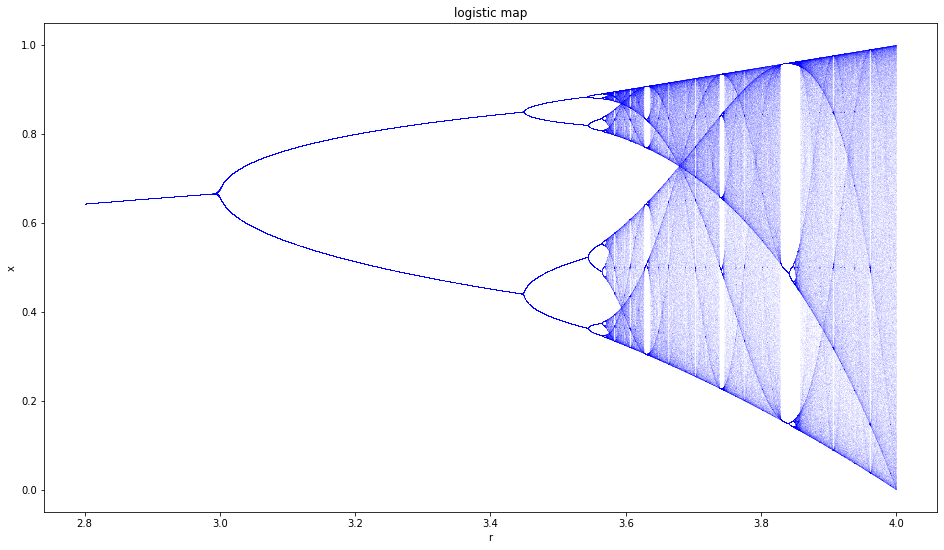

In [29]:
# hide
interval = (2.8, 4)  # start, end
accuracy = 0.0001
reps = 600  # number of repetitions
numtoplot = 200
lims = np.zeros(reps)

fig, biax = plt.subplots()
fig.set_size_inches(16, 9)

lims[0] = np.random.rand()
for r in np.arange(interval[0], interval[1], accuracy):
    for i in range(reps - 1):
        lims[i + 1] = r * lims[i] * (1 - lims[i])

    biax.plot([r] * numtoplot, lims[reps - numtoplot :], "b.", markersize=0.02)

biax.set(xlabel="r", ylabel="x", title="logistic map")

## Chaos Example 2: The Butterfly Attractor (Lorenz '63)

Lorenz was most interested in toy models that behaved more like weather models, which are NOT discrete in time. Weather models used for forecasting have SDIC.

For example, you and I might both go outside with thermometers to measure the current temperature which we could then feed into a weather model to predict future temperatures later in the day. However, although we were outside in the same place at the same time, our temperature measurements might differ slightly. In a system with <font color="purple">SDIC</font>, these slight differences could yield very different weather predictions.

SDIC in weather predictions has led to many studies in applied mathematics attempting to manage SDIC in toy models where ground truth is simulated.

Lorenz described these characteristics in his "Lorenz '63 model" which is also commonly known as the "Butterfly Attractor". This is a very popular toy model for exploring SDIC in dynamical systems like those used to model weather.

$
% \begin{align}
\displaystyle
\frac {\mathrm {d} x(t)}{\mathrm {d} t}=\sigma (y(t)-x(t)),\hspace{1cm}
\frac {\mathrm {d} y(t)}{\mathrm {d} t}=x(t)(\rho -z(t))-y(t),\hspace{1cm}
\frac {\mathrm {d} z(t)}{\mathrm {d} t}=x(t)\cdot y(t)-\beta z(t)
% \end{align}
$

where $x,\,y,\,z$ are functions in time representing "atmospheric quantities" (again, this is a toy model) 

and $\sigma,\,\rho,\,\beta$ represent model ***parameters*** which can be adjusted to tune the model to behave differently (like $r$ in the Logistic Map).

This set of equations includes three derivatives: $\displaystyle \frac {\mathrm {d} x}{\mathrm {d} t},\,\frac {\mathrm {d} y}{\mathrm {d} t},\,\frac {\mathrm {d} z}{\mathrm {d} t}\hspace{.25cm}$ with which we simulate system dynamics using only initial starting values: $x_0,\,y_0,\,z_0$

To simulate dynamics, we need to "integrate" these equations. But, if you start writing out integrals and attempting to solve for $x(t),\,y(t),\,z(t)$, you will find that you cannot determine a solution.

Instead, we ***numerically integrate*** each equation. The strategy works by:
<ol>
    <li>Breakup time into discrete time step (as in the Logistic Map simulation). Let $t=0$ denote the starting point when $x(0)=x_0,\,y(0)=y_0,\,z(0)=z_0$</li>
    <li>Use the values of $x,\,y,\,z$ at time $t$ and their derivative functions to estimate the values of $x,\,y,\,z$ at time $t+1$</li>
    <li>Repeat with the new values as many steps into the future as desired</li>
</ol>

$
\displaystyle
\begin{align}
\frac {\mathrm {d} x(t)}{\mathrm {d} t} &=\sigma (y(t)-x(t))
\\\\
\Rightarrow \lim_{dt\rightarrow0}\frac{x(t+dt)-x(t)}{dt} &=\sigma (y(t)-x(t))
\hspace{.5cm}\text{using the derivative equation}
\\\\
\Rightarrow \frac{x(t+dt)-x(t)}{dt} &\approx \sigma (y(t)-x(t))
\hspace{.5cm}\text{assuming }dt\text{ is small instead of }dt\rightarrow0
\\\\
\Rightarrow \color{blue}{x(t+dt)} &\approx x(t)+dt\cdot\left(\sigma (y(t)-x(t))\right)
= \color{blue}{x(t)+dt\cdot\frac {\mathrm {d} x(t)}{\mathrm {d} t}}
\end{align}
$

after some algebra and remembering that $dt$ is a small number.

Similar math applies to the derivatives for $y(t),\,z(t)$

This gives us ***Euler's Method for Forward Integration***. Given a derivative function $f'(t)$ and an initial value $f(0)=a$, we can use Euler's method to take discrete steps through time each of size $dt$ calculate the next value of $f$ according to 
$$
f(t+dt)\approx f(t)+dt\cdot f'(t)
$$

Let's see this approach in action by considering the derivative function $\hspace{.25cm}f'(t)=3 t^{2} - 16 t + 15\hspace{.25cm}$ and $f(0)=5$

We know how to integrate this: $\hspace{.25cm}\int f'(t)\,dt = t^{3} - 8 t^{2} + 15 t + 5\hspace{.25cm}$ which gives a ground truth to compare our method too.

In [30]:
# hide
t = sympy.symbols('t')
f = t*(t-3)*(t-5)+5
f1 = sympy.diff(f,t)
numpy_f = sympy.lambdify(t,f,"numpy")
numpy_f1 = sympy.lambdify(t,f1,"numpy")

def forwardEulerStep(f1,dt,t):
    """
    Use the derivative function, f1, to estimate the integral's change one step forward in time
    """
    return dt*f1(t)

def integrator(f1,dt,f0,numTimeSteps):
    """
    f1: derivative function
    dt: size of time step to use. Should be small.
    f0: initial value to start simulation
    numTimeSteps: number of time steps into the future to simulate.
    """
    trajectory = np.zeros(numTimeSteps)
    f_old = f0
    for t in range(numTimeSteps):
        f_new = f_old+forwardEulerStep(f1,dt,t*dt)
        trajectory[t] = f_new
        f_old = f_new
    times = np.arange(numTimeSteps)*dt
    return trajectory,times



def forwardEulerDemo(numTimeSteps,dt,plotIntegral=False,showNextStep=True):
    x = np.linspace(0,6,30)
    y = numpy_f(x)
    trajectory,times = integrator(numpy_f1,dt,y[0],numTimeSteps)
    plt.plot(times,trajectory,'r-',label="Simulation")
    if showNextStep:
        df = forwardEulerStep(numpy_f1,dt,dt*numTimeSteps)
        plt.plot([times[-1],times[-1]+dt],[trajectory[-1],trajectory[-1]+df],'b-',label="Next Euler Step")
        plt.text(times[-1]+dt,trajectory[-1]+df,"$f(t)+dt\\cdot f'(t)$",color='b',fontsize=12)
    if plotIntegral:
        plt.plot(x,y,'k-',label="Ground Truth")
    plt.xlim((x[0],x[-1]))
    plt.ylim((np.min(y),np.max(y)))
    plt.legend(fontsize=15,frameon=False)
    plt.xlabel("Time $t$",fontsize=15)
    plt.ylabel("f(t)",fontsize=15)
    
# widgets.interact(forwardEulerDemo,numTimeSteps=(0,500,1),dt=(.001,.5,.005),plotIntegral=False)

slider_euler_steps = IntSlider(min=1,max=500,step=1,value=250,description="# Time Steps:")
slider_euler_dt = FloatSlider(min=.001,max=.5,step=.005,value=.25,description="dt:")
slider_euler_showAnswer = Checkbox(value=False,description="Show Answer:")
slider_euler_showEuler = Checkbox(value=False,description="Show Next Euler Step:")

widgets.HBox(
    [
        widgets.VBox([slider_euler_steps,slider_euler_dt,slider_euler_showEuler,slider_euler_showAnswer]),
            widgets.interactive_output(
                forwardEulerDemo,
                {
                    'numTimeSteps':slider_euler_steps,
                    'dt':slider_euler_dt,
                    'plotIntegral':slider_euler_showAnswer,
                    "showNextStep":slider_euler_showEuler,
                })
    ]
)

Returning to the Lorenz system of equations, Euler's Method tells us $\hspace{.5cm}x(t+dt)\approx \color{blue}{x(t)}+dt\cdot\left(\sigma (\color{red}{y(t)}-\color{blue}{x(t)})\right)\hspace{.5cm}$ 

This tells us that calculating the future value of $\hspace{.25cm}x(t+dt)\hspace{.25cm}$ requires $\hspace{.25cm}\color{red}{y(t)},\,\color{blue}{x(t)}\hspace{.25cm}$ from the current time step.

You'll observe a similar outcome for integrating $\hspace{.25cm}y(t),\,z(t)\hspace{.25cm}$ because the derivatives of these functions depend on the other variables too.

This means that we need to simulate outcomes for $\hspace{.25cm}x(t),\,y(t),\,z(t)\hspace{.25cm}$ together at each time step.

In [31]:
# pick model parameters. Here, standard parameter choices are used.
sigma,rho,beta = 10,28,8/3
# choose time step. Smaller will be more accurate but require longer runtime
dt = .01
numTimeSteps = 1000

# define derivative functions
x1 = lambda x,y,z: sigma*(y-x)
y1 = lambda x,y,z: x*(rho-z)-y
z1 = lambda x,y,z: x*y-beta*z

def lorenzDerivative(state):
    x,y,z = state[0],state[1],state[2]
    dx = x1(x,y,z)
    dy = y1(x,y,z)
    dz = z1(x,y,z)
    return np.array([dx,dy,dz])

def simluateLorenz(xyz,numTimeSteps,dt):
    # simulate trajectory
    trajectory = np.zeros((numTimeSteps,3))
    xyz_old = xyz
    for t in range(numTimeSteps):
        # use Forward Euler to estimate f at the new time step based on old time step
        xyz_new = xyz_old + dt*lorenzDerivative(xyz_old)
        trajectory[t,:] = xyz_new
        xyz_old = xyz_new
    # convert from 'time steps' to 'time'
    times = np.arange(numTimeSteps)*dt
    return trajectory,times

trajectory1,times1 = simluateLorenz(np.array([.1,.1,.1]),numTimeSteps,dt)
trajectory2,times2 = simluateLorenz(np.array([.2,.1,.1]),numTimeSteps,dt)

Text(0.5, 0, 'Time t')

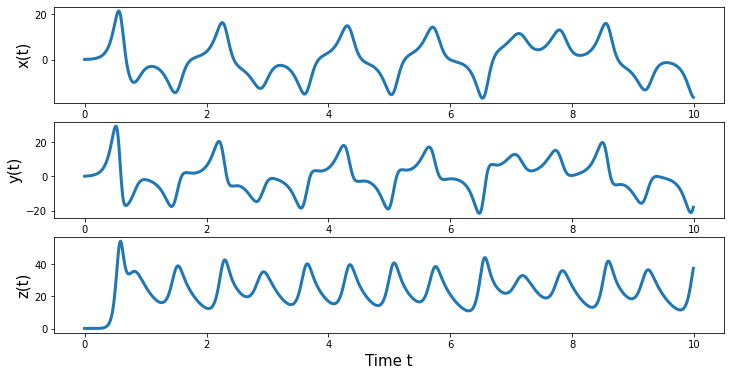

In [32]:
# hide
l = 3
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(times1,trajectory1[:,0],lw=l,)
plt.ylabel("x(t)",fontsize=15)
plt.subplot(3,1,2)
plt.plot(times1,trajectory1[:,1],lw=l,)
plt.ylabel("y(t)",fontsize=15)
plt.subplot(3,1,3)
plt.plot(times1,trajectory1[:,2],lw=l,)
plt.ylabel("z(t)",fontsize=15)
plt.xlabel("Time t",fontsize=15)

Let's see the "Butterfly attractor" and it's "folding" behavior near the middle.

In [33]:
# hide
from mpl_toolkits.mplot3d import Axes3D

def rotate_butterfly_plot(degree_x=0, degree_y=0, degree_z=0):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(trajectory1[:, 0], trajectory1[:, 1], trajectory1[:, 2])
    ax.view_init(elev=degree_x, azim=degree_y)
    ax.set_xlabel("x(t)",fontsize=15)
    ax.set_ylabel("y(t)",fontsize=15)
    ax.set_zlabel("z(t)",fontsize=15)


slider_butterfly_x = IntSlider(min=0,max=360,step=1,value=0,description="Vertical Angle:")
slider_butterfly_z = IntSlider(min=0,max=360,step=1,value=0,description="Horizontal Angle:")


widgets.HBox(
    [
        widgets.VBox([slider_butterfly_x,slider_butterfly_z,]),
            widgets.interactive_output(
                rotate_butterfly_plot,
                {
                    'degree_x':slider_butterfly_x,
                    'degree_y':slider_butterfly_z,
                })
    ]
)

Let's compare the two simulations with slightly different starting conditions:
- Trajectory 1: $\hspace{.25cm}\color{red}{x(0)=0.1},\,y(0)=0.1,\,z(0)=0.1$
- Trajectory 2: $\hspace{.25cm}\color{red}{x(0)=0.2},\,y(0)=0.1,\,z(0)=0.1$

Text(0.5, 0, 'Time t')

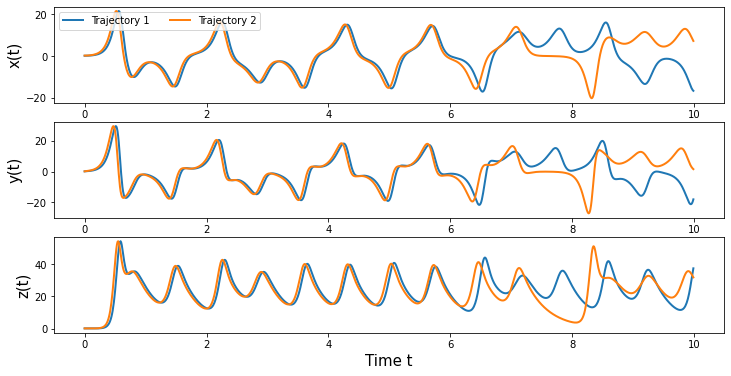

In [34]:
# hide
l=2
plt.figure(figsize=(12,6))
plt.subplot(3,1,1)
plt.plot(times1,trajectory1[:,0],lw=l,label="Trajectory 1")
plt.plot(times2,trajectory2[:,0],lw=l,label="Trajectory 2")
plt.legend(ncols=2,loc="upper left")
plt.ylabel("x(t)",fontsize=15)
plt.subplot(3,1,2)
plt.plot(times1,trajectory1[:,1],lw=l,)
plt.plot(times2,trajectory2[:,1],lw=l,)
plt.ylabel("y(t)",fontsize=15)
plt.subplot(3,1,3)
plt.plot(times1,trajectory1[:,2],lw=l,)
plt.plot(times2,trajectory2[:,2],lw=l,)
plt.ylabel("z(t)",fontsize=15)
plt.xlabel("Time t",fontsize=15)

In [35]:
# hide
from mpl_toolkits.mplot3d import Axes3D

def rotate_butterfly_plot(degree_x=0, degree_y=0, degree_z=0):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(trajectory1[:, 0], trajectory1[:, 1], trajectory1[:, 2],label="Trajectory 1")
    ax.plot(trajectory2[:, 0], trajectory2[:, 1], trajectory2[:, 2],label="Trajectory 2")
    ax.legend()
    ax.view_init(elev=degree_x, azim=degree_y)
    ax.set_xlabel("x(t)",fontsize=15)
    ax.set_ylabel("y(t)",fontsize=15)
    ax.set_zlabel("z(t)",fontsize=15)


slider_butterfly_x = IntSlider(min=0,max=360,step=1,value=0,description="Vertical Angle:")
slider_butterfly_z = IntSlider(min=0,max=360,step=1,value=0,description="Horizontal Angle:")


widgets.HBox(
    [
        widgets.VBox([slider_butterfly_x,slider_butterfly_z,]),
            widgets.interactive_output(
                rotate_butterfly_plot,
                {
                    'degree_x':slider_butterfly_x,
                    'degree_y':slider_butterfly_z,
                })
    ]
)